# **Importing the Dependencies**

In [40]:
# loading
import pandas as pd
import numpy as np
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
#preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from collections import Counter
# Classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier

# **Data Collection**

In [41]:
from google.colab import drive
drive.mount('/content/drive')

# Navigate to the file path and read it
import pandas as pd
file_path = '/content/drive/My Drive/csv file/city_day.csv'

# link of the dataset
# https://drive.google.com/file/d/1AaVlRYHos_jZzjYz22l0oTQYpaCfqSCf/view?usp=drive_link

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
data = pd.read_csv(file_path)
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [43]:
data.shape

(29531, 16)

# **Data Cleaning**

In [44]:
data.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [45]:
data.rename(columns = {'AQI_Bucket':'Air_quality'}, inplace = True)

In [46]:
cities = data['City'].value_counts()
print(f'Total number of cities in the dataset : {len(cities)}')
print(cities.index)

Total number of cities in the dataset : 26
Index(['Ahmedabad', 'Delhi', 'Mumbai', 'Bengaluru', 'Lucknow', 'Chennai',
       'Hyderabad', 'Patna', 'Gurugram', 'Visakhapatnam', 'Amritsar',
       'Jorapokhar', 'Jaipur', 'Thiruvananthapuram', 'Amaravati',
       'Brajrajnagar', 'Talcher', 'Kolkata', 'Guwahati', 'Coimbatore',
       'Shillong', 'Chandigarh', 'Bhopal', 'Ernakulam', 'Kochi', 'Aizawl'],
      dtype='object', name='City')


In [47]:
# Convert string to datetime64
data['Date'] = pd.to_datetime(data['Date'])
#data.set_index('Date',inplace=True)

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   City         29531 non-null  object        
 1   Date         29531 non-null  datetime64[ns]
 2   PM2.5        24933 non-null  float64       
 3   PM10         18391 non-null  float64       
 4   NO           25949 non-null  float64       
 5   NO2          25946 non-null  float64       
 6   NOx          25346 non-null  float64       
 7   NH3          19203 non-null  float64       
 8   CO           27472 non-null  float64       
 9   SO2          25677 non-null  float64       
 10  O3           25509 non-null  float64       
 11  Benzene      23908 non-null  float64       
 12  Toluene      21490 non-null  float64       
 13  Xylene       11422 non-null  float64       
 14  AQI          24850 non-null  float64       
 15  Air_quality  24850 non-null  object        
dtypes: d

In [49]:
# Check for missing values
print(data.isnull().sum())


City               0
Date               0
PM2.5           4598
PM10           11140
NO              3582
NO2             3585
NOx             4185
NH3            10328
CO              2059
SO2             3854
O3              4022
Benzene         5623
Toluene         8041
Xylene         18109
AQI             4681
Air_quality     4681
dtype: int64


In [50]:
# Fill missing values only for numeric columns
numeric_cols = data.select_dtypes(include=[np.number]).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())

In [51]:
# Example of filling missing values in categorical columns with mode
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

In [52]:
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Air_quality
0,Ahmedabad,2015-01-01,48.57,95.68,0.92,18.22,17.15,15.85,0.92,27.64,133.36,0.00,0.02,0.00,118.0,Moderate
1,Ahmedabad,2015-01-02,48.57,95.68,0.97,15.69,16.46,15.85,0.97,24.55,34.06,3.68,5.50,3.77,118.0,Moderate
2,Ahmedabad,2015-01-03,48.57,95.68,17.40,19.30,29.70,15.85,17.40,29.07,30.70,6.80,16.40,2.25,118.0,Moderate
3,Ahmedabad,2015-01-04,48.57,95.68,1.70,18.48,17.97,15.85,1.70,18.59,36.08,4.43,10.14,1.00,118.0,Moderate
4,Ahmedabad,2015-01-05,48.57,95.68,22.10,21.42,37.76,15.85,22.10,39.33,39.31,7.01,18.89,2.78,118.0,Moderate


# **Exploratory Data Analysis (EDA)**

In [53]:
print(f"The available data is between {data['Date'].min()} and {data['Date'].max()}")

The available data is between 2015-01-01 00:00:00 and 2020-07-01 00:00:00


In [54]:
data['Air_quality'].unique()

array(['Moderate', 'Poor', 'Very Poor', 'Severe', 'Satisfactory', 'Good'],
      dtype=object)

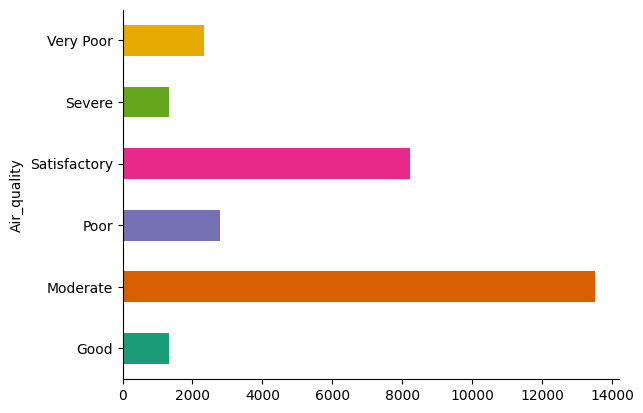

In [55]:
from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('Air_quality').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [56]:
data['Air_quality'].value_counts()

,count
Air_quality,
Moderate,13510
Satisfactory,8224
Poor,2781
Very Poor,2337
Good,1341
Severe,1338


In [57]:
data['City'].unique()

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

In [58]:
data['City'].value_counts()

,count
City,
Ahmedabad,2009
Delhi,2009
Mumbai,2009
Bengaluru,2009
Lucknow,2009
Chennai,2009
Hyderabad,2006
Patna,1858
Gurugram,1679


In [59]:
print(data.isnull().sum())

City           0
Date           0
PM2.5          0
PM10           0
NO             0
NO2            0
NOx            0
NH3            0
CO             0
SO2            0
O3             0
Benzene        0
Toluene        0
Xylene         0
AQI            0
Air_quality    0
dtype: int64


In [60]:
data['Air_quality'] = data['Air_quality'].map({'Severe':0,'Very Poor': 1,'Poor':2, 'Moderate':3,'Satisfactory':4,'Good':5})

In [61]:
# Convert Date column to pandas datetime format
#data['Date'] = pd.to_datetime(data['Date'])

# Extract additional time-related features
#data['year'] = data['Date'].dt.year
#data['month'] = data['Date'].dt.month
#data['day'] = data['Date'].dt.day

# Display updated dataset
#data.head()

In [62]:
data.describe()

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Air_quality
count,29531,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000
mean,2018-05-14 05:40:15.807118080,64.510857,109.659366,16.642601,27.726576,31.063568,20.813789,2.153872,13.830897,33.994121,2.859874,7.140485,1.788420,158.781552,2.980935
min,2015-01-01 00:00:00,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,2017-04-16 00:00:00,32.150000,79.315000,6.210000,12.980000,14.670000,12.040000,0.540000,6.090000,20.740000,0.240000,1.280000,0.980000,88.000000,3.000000
50%,2018-08-05 00:00:00,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000,3.000000
75%,2019-09-03 00:00:00,72.450000,111.880000,17.570000,34.665000,36.015000,21.755000,1.380000,13.810000,42.730000,2.420000,6.020000,0.980000,179.000000,4.000000
max,2020-07-01 00:00:00,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000,5.000000
std,NaN,59.807551,72.324020,21.506064,23.050531,29.477748,21.028862,6.724660,17.005647,20.202304,14.252822,17.224737,4.062039,130.272413,1.130620


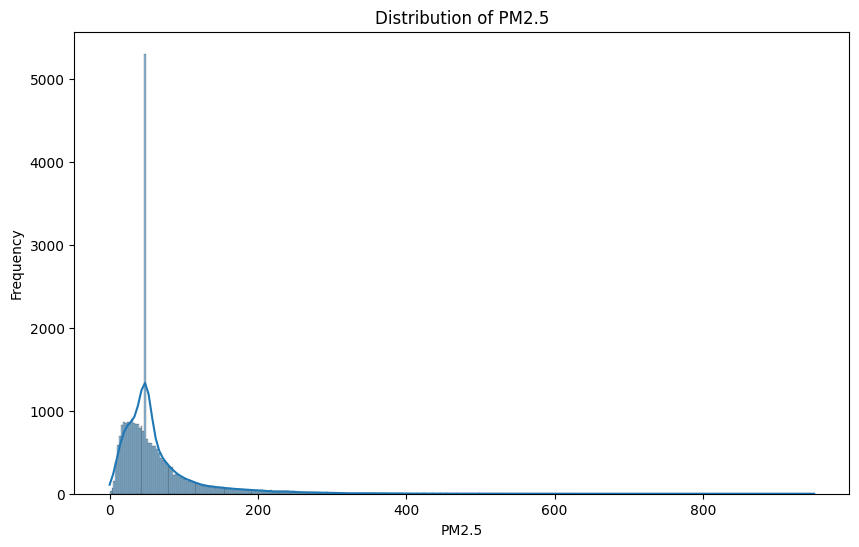

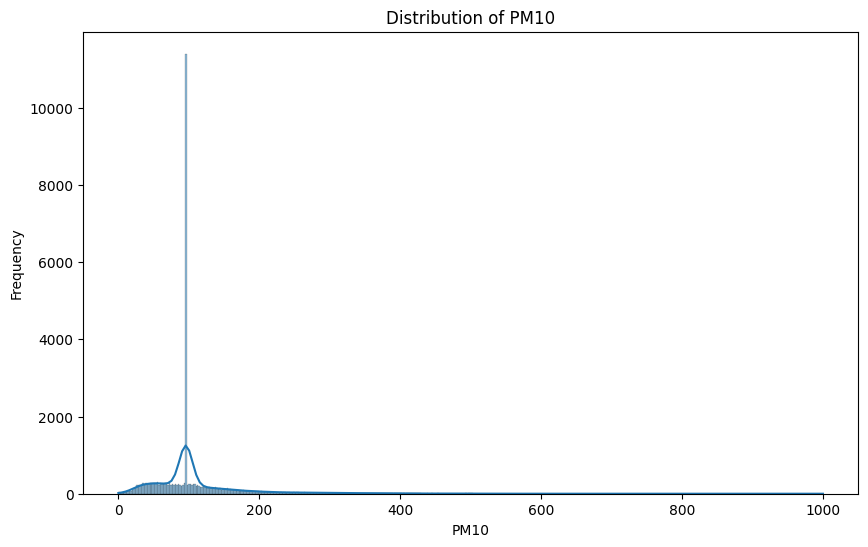

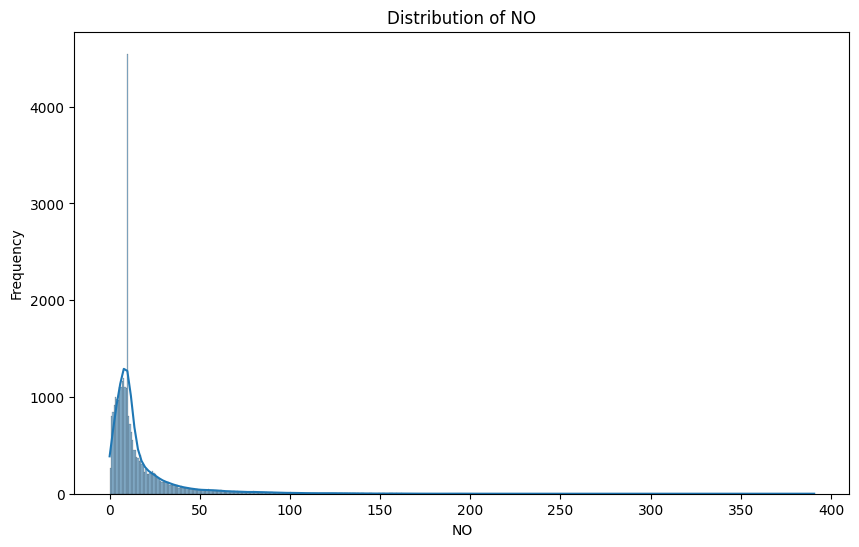

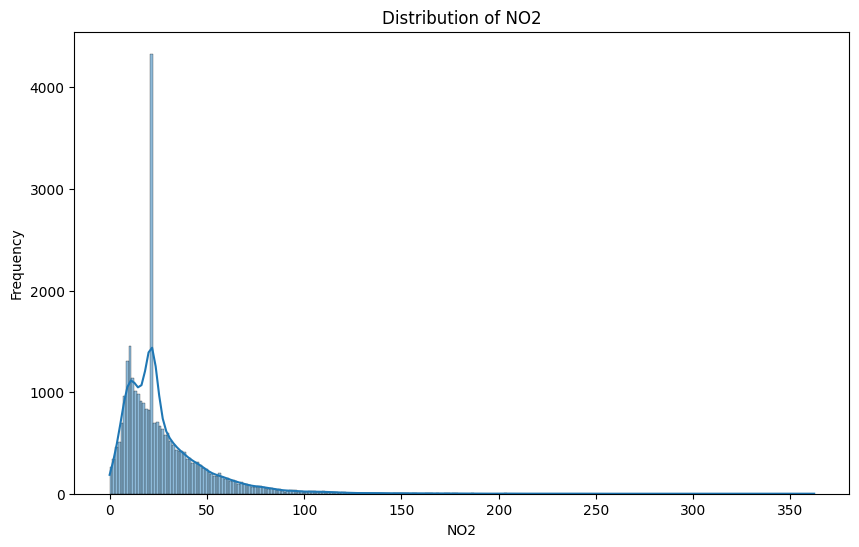

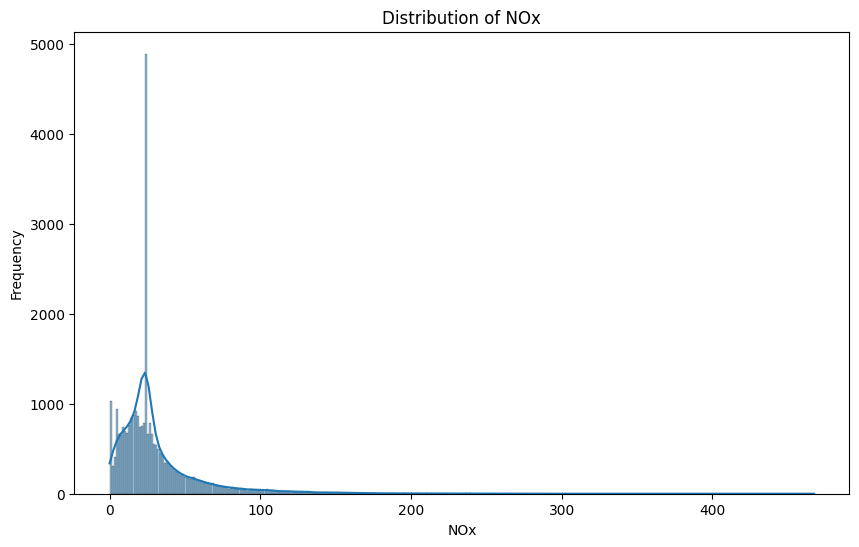

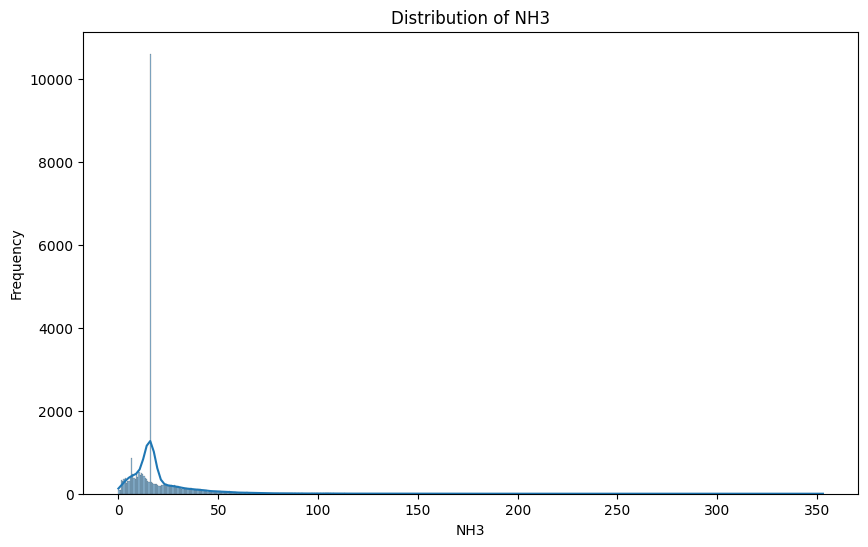

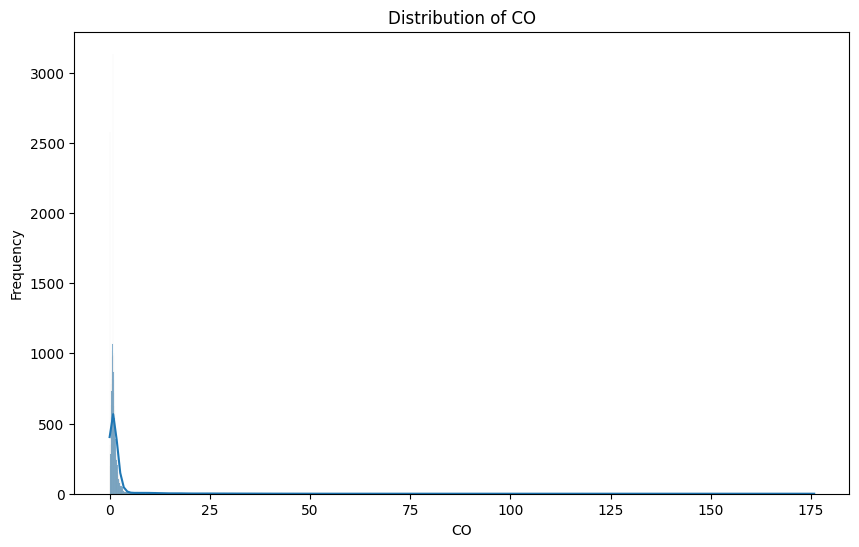

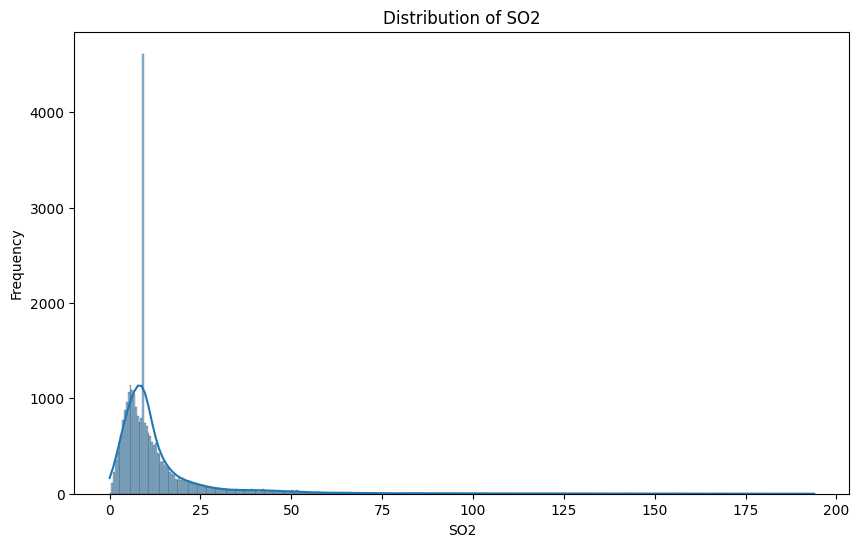

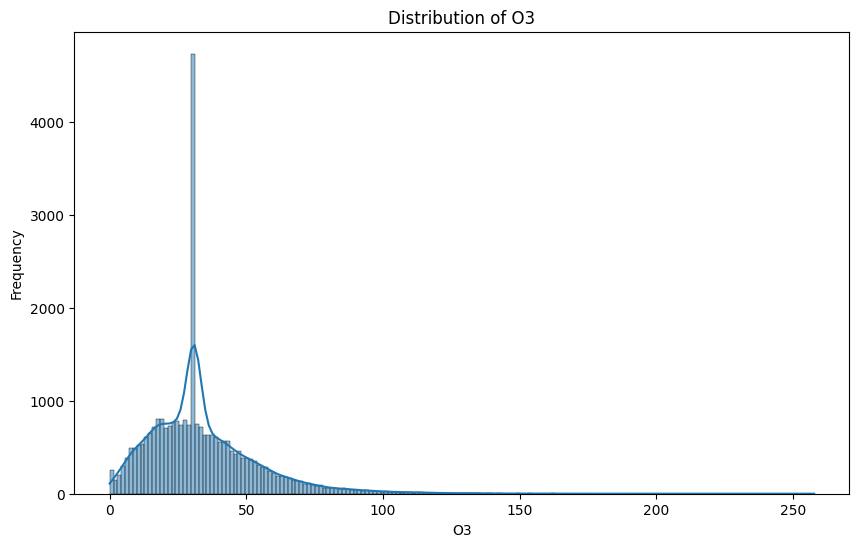

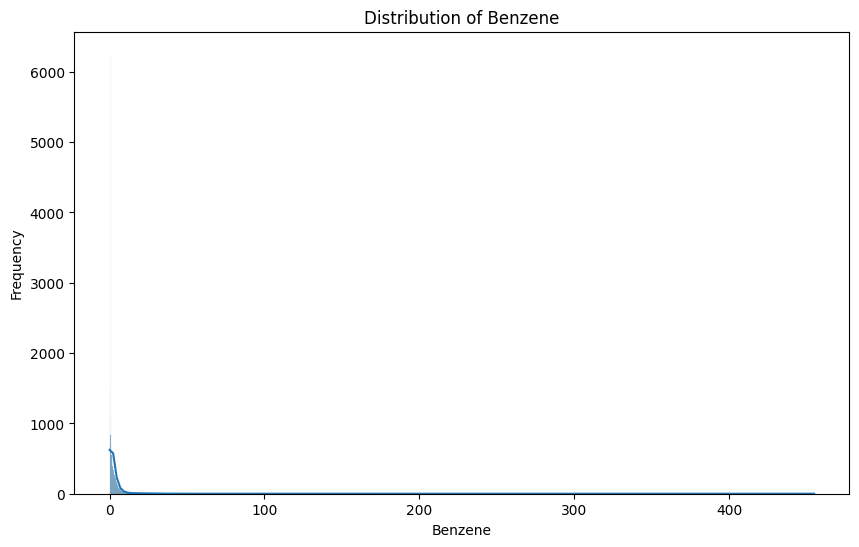

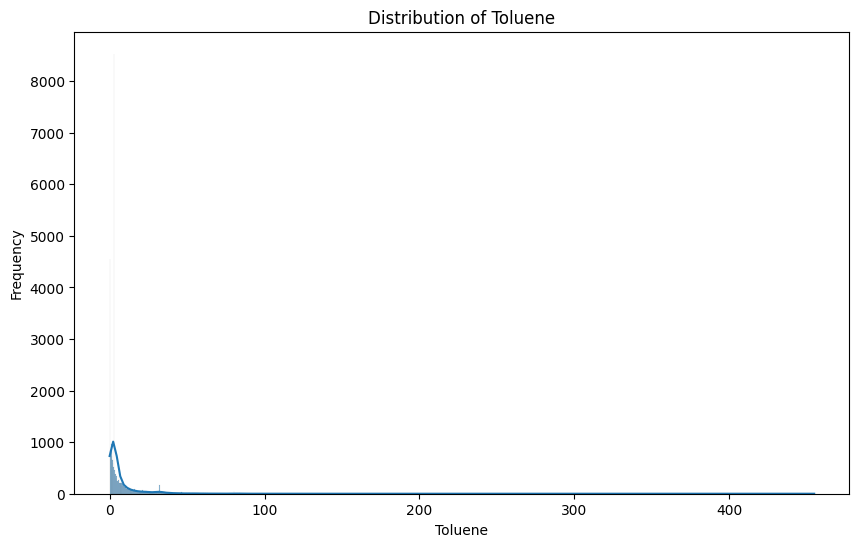

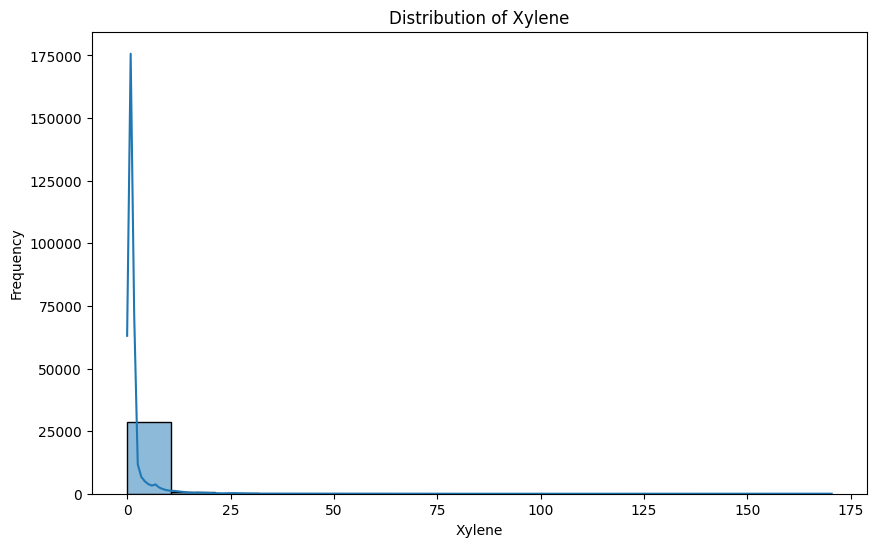

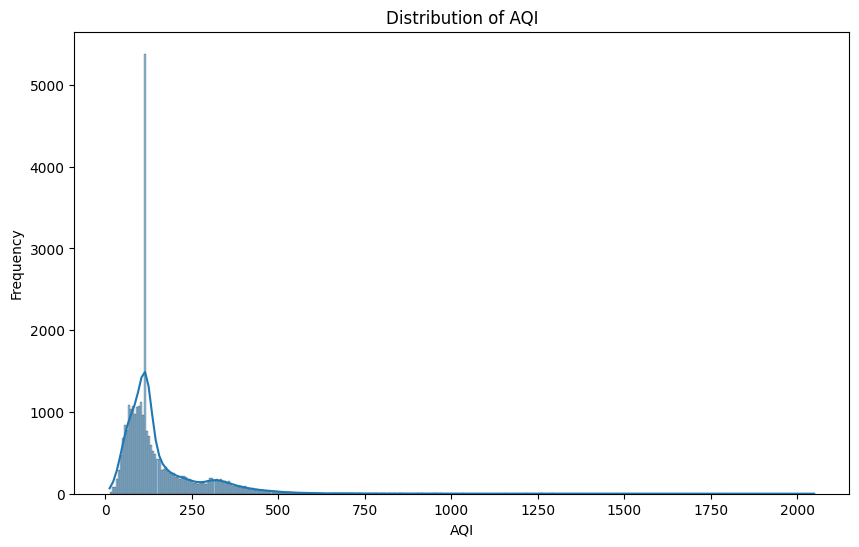

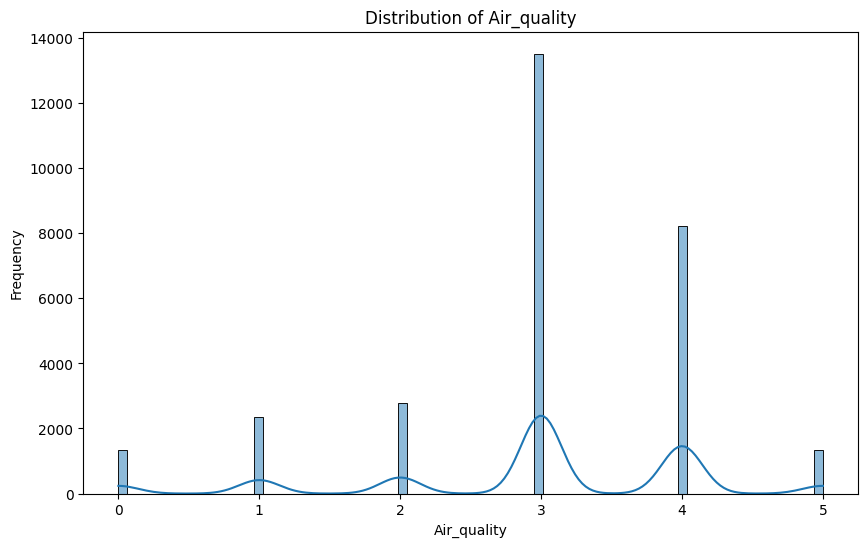

In [63]:
# Distribution of air pollutants
pollutants = ['PM2.5','PM10','NO', 'NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene','AQI','Air_quality']
for pollutant in pollutants:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[pollutant], kde=True)
    plt.title(f'Distribution of {pollutant}')
    plt.xlabel(pollutant)
    plt.ylabel('Frequency')
    plt.show()

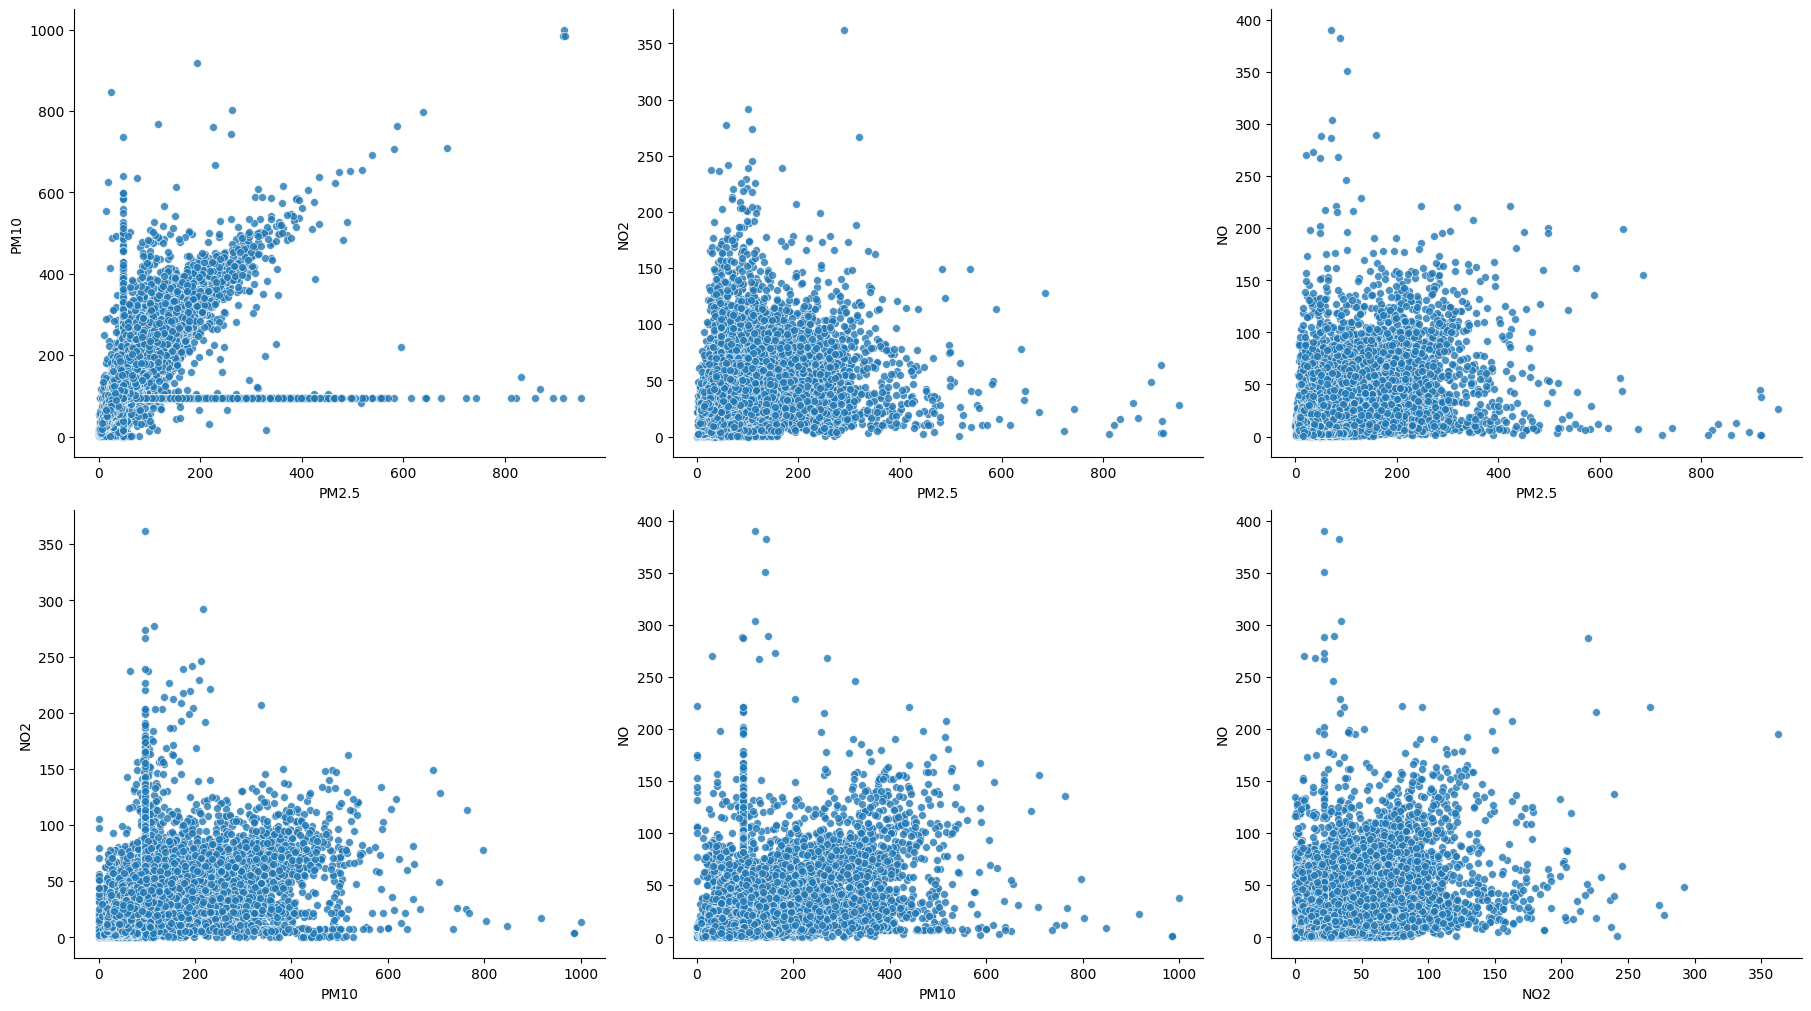

In [64]:
# Define the pairs of pollutants to plot
pairs = [
    ('PM2.5', 'PM10'),
    ('PM2.5', 'NO2'),
    ('PM2.5', 'NO'),
    ('PM10', 'NO2'),
    ('PM10', 'NO'),
    ('NO2', 'NO')
]

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10), constrained_layout=True)

# Flatten the 2x3 grid of axes
axes = axes.flatten()

# Loop through each pair and corresponding subplot
for ax, (x, y) in zip(axes, pairs):
    sns.scatterplot(data=data, x=x, y=y, s=32, alpha=0.8, ax=ax)
    sns.despine(ax=ax)  # Remove top and right spines
    ax.set_xlabel(x)
    ax.set_ylabel(y)

# Show the plots
plt.show()


Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)


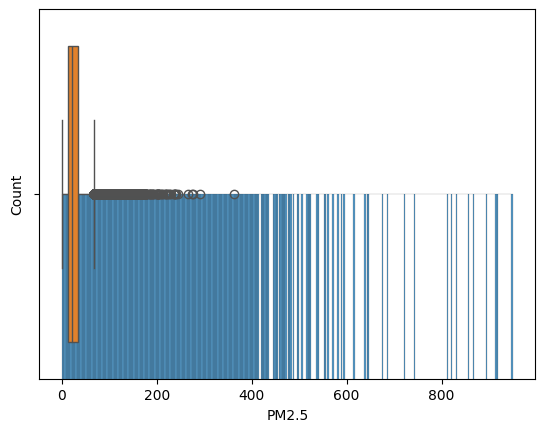

In [65]:
# Distribution plots
print(sns.histplot(data['PM2.5']))
print(sns.boxplot(x=data['NO2']))

In [66]:
data1 = data.drop(columns=['City','Date'])

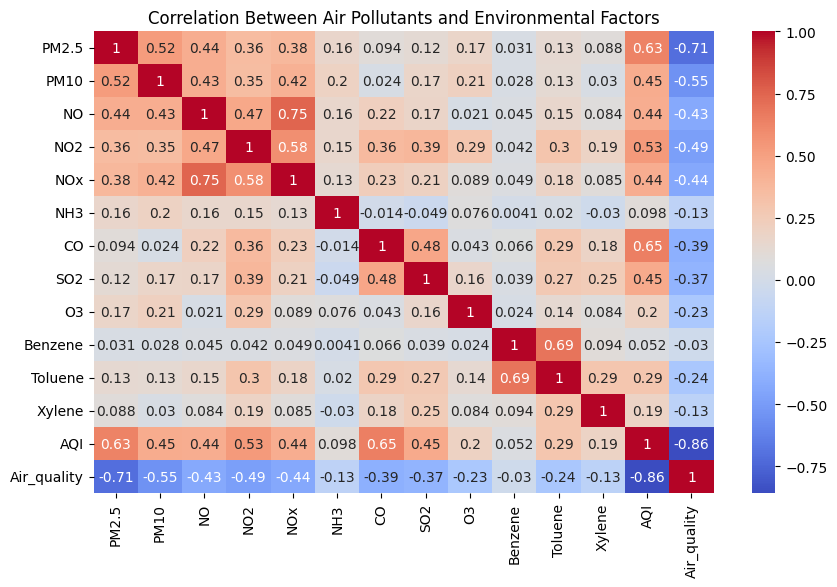

In [67]:
# Create a correlation matrix
corr_matrix = data1.corr()
# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Air Pollutants and Environmental Factors')
plt.show()

In [68]:
from matplotlib import pyplot as plt
import seaborn as sns

def _plot_series(series, series_name, series_index, pollutant, ax):
    palette = list(sns.palettes.mpl_palette('Dark2'))
    xs = series['Date']
    ys = series[pollutant]
    ax.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

def plot_multiple_pollutants(or_data):
    pollutants = ['PM2.5', 'PM10', 'NO2']
    fig, axes = plt.subplots(3, 1, figsize=(10, 15.6), constrained_layout=True)

    df_sorted = data.sort_values('Date', ascending=True)
    for i, (series_name, series) in enumerate(df_sorted.groupby('AQI_Bucket')):
        for j, pollutant in enumerate(pollutants):
            _plot_series(series, series_name, i, pollutant, axes[j])

    for ax, pollutant in zip(axes, pollutants):
        ax.legend(title='Air_quality', bbox_to_anchor=(1, 1), loc='upper left')
        sns.despine(fig=fig, ax=ax)
        ax.set_xlabel('Date')
        ax.set_ylabel(pollutant)

    plt.show()

In [69]:
#df = data[['SO2','year','City']].groupby(["year"]).median().reset_index().sort_values(by='year',ascending=False)
#f,ax=plt.subplots(figsize=(15,5))
#sns.pointplot(x='year', y='SO2', data=df)


# **Model Building**

In [70]:
X = data.drop(columns = ['City','AQI','Air_quality','Date'])

In [71]:
y = data['AQI']

In [72]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# **Model Evaluation and Validation**

## **Linear Regression**

In [73]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [74]:
from sklearn.metrics import mean_squared_error, r2_score

# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 2819.048835338229
R-squared: 0.8232408884458073


## **Random Forest**

In [75]:
y = data["Air_quality"]
x = data[[ 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [76]:
print('Classes and number of values in trainset',Counter(y_train))

Classes and number of values in trainset Counter({3: 9393, 4: 5799, 2: 1940, 1: 1634, 0: 957, 5: 948})


In [77]:
rf = RandomForestClassifier(n_estimators=20, random_state=23)
rf.fit(X_train, y_train)
rf_predict=rf.predict(X_test)
rf_predict1=rf.predict(X_train)
rf_conf_matrix = confusion_matrix(y_test, rf_predict)
rf_acc_score = accuracy_score(y_test, rf_predict)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("accuracy",rf_acc_score*100)

confussion matrix
[[ 374    4    3    0    0    0]
 [   1  700    2    0    0    0]
 [   0    3  837    1    0    0]
 [   0    0    0 4117    0    0]
 [   0    0    0    2 2422    1]
 [   0    0    0    0    4  389]]


accuracy 99.7629796839729
